In [1]:
import spacy
import pdfminer
import re
import os
import pandas as pd

In [2]:
df = pd.read_csv('job_Data_File.csv')
df

,job_title,company_Name,job_url,job_Location,job_Summery,job_posted_Date,job_Salary
0,Application Developer,US Signal Company LLC,https://www.indeed.com/cmp/US-Signal,"Grand Rapids, MI 49503 (Heartside area)",2+ years experience working in a software deve...,EmployerActive 16 days ago,NaN
1,NaN,"CU*Answers, Inc.","https://www.indeed.com/jobs?q=Cu*answers,+Inc&...","Grand Rapids, MI 49546",The Programmer is responsible for responsible ...,Posted3 days ago,Estimated $45.3K – $57.3K a year
2,Web Developer,Macatawa Bank,https://www.indeed.com/cmp/Macatawa-Bank,"Holland, MI 49424",The Web Developer is responsible for providing...,Posted30+ days ago,Estimated $67.7K – $85.7K a year
3,Junior Full Stack Developer,Revature,https://www.indeed.com/cmp/Revature-8,"Wyoming, MI+1 location",College degree (Associates or Bachelors).,Posted30+ days ago,Estimated $72.7K – $92.1K a year
4,NaN,Recruiting From Scratch,https://www.indeed.com/addlLoc/redirect?tk=1fr...,"Remote in Kentwood, MI+6 locations","Work with our clients' end users, the founding...",Posted1 day ago,Estimated $89.9K – $114K a year
...,...,...,...,...,...,...,...
235,Senior Software Engineer - Artificial Intellig...,"Cotiviti, Inc.",https://www.indeed.com/cmp/Cotiviti,United States,The Sr. Software Engineer (AI/ML Ops) is prima...,Posted30+ days ago,NaN
236,Senior Statistical Programmer,"Cytel, Inc (USA)",https://www.indeed.com/cmp/Cytel-Inc,United States,"As a Senior Statistical Programmer, you will l...",Posted28 days ago,NaN
237,Entry Level Software Developer,Smoothstack Inc,https://www.indeed.com/cmp/Smoothstack-Inc.,United States,We mainly specialize in Full Stack Java develo...,Posted29 days ago,NaN
238,Beginner to Mid-Level Software Engineer,GenSpark,NaN,United States,"During your first 6-12 weeks with GenSpark, we...",Posted21 days ago,NaN


In [21]:
summery = df.loc[:,'job_Summery']
summery = summery.reset_index(drop=True)
summery = summery.to_string()

In [22]:
nlp = spacy.load("en_core_web_sm") # load the english language model
doc = nlp(summery)

In [37]:
buzz_words1 = [entity.text for entity in doc.ents if entity.label_ == ("PERSON")]
buzz_words1

['Software Enginee',
 'develo',
 'Deksia',
 'Byrne',
 'develo',
 'Core Purpose',
 'Develo',
 'Rapidly',
 'Develo',
 'Projé',
 'Develo',
 'Java D',
 'Statistical Programmer']

In [39]:
buzz_words2 = [entity.text for entity in doc.ents if entity.label_ == ("ORG")]
buzz_words2

['Programmer',
 'PHP',
 'PRO-VISION Video Systems',
 'Software Engineers',
 'Python Developer',
 'De',
 'Lake Michigan Credit Union',
 'Digital Operations',
 'The Front End Web Developer',
 'Dematic',
 'GE Aviation Systems Avionics Engineering',
 'Create',
 'Ap',
 'Software',
 'AI',
 'Create',
 'Hardware/Software Test Design Engin',
 'Lighthouse',
 'KPMG',
 'Consulting',
 'Cull Group',
 'The Mechatronics, Mirrors and Lighting',
 'Front End Engineer',
 'BDO',
 'Helping People Thrive Ev',
 'Revature',
 'Bachelor',
 "Master's Degree in Computer Scie",
 'The Software Engineering',
 'the R & D',
 'The Cloud DevOps Engineer',
 'Software Engineers',
 'The Java Developer',
 'The Cloud DevOps Engineer',
 'Software Engineers',
 'DornerWorks',
 'Front End Engineer',
 'The Software Engineering',
 'The Cloud DevOps Engineer',
 'Selenium',
 'Mobile Software Engineers',
 'Digital Marketing',
 'DevOps Engineer',
 'DevOps',
 'SQL',
 'Deloitte',
 'Tax Management',
 'Design &',
 'AI',
 'Chemical',
 'Spe'

In [40]:
buzz_words = buzz_words1+buzz_words2

In [45]:
buzz_words_res = {}

for i in buzz_words:
    buzz_words_res[i] = buzz_words.count(i)
    
buzz_words_res    

{'Software Enginee': 1,
 'develo': 2,
 'Deksia': 1,
 'Byrne': 1,
 'Core Purpose': 1,
 'Develo': 3,
 'Rapidly': 1,
 'Projé': 1,
 'Java D': 1,
 'Statistical Programmer': 1,
 'Programmer': 1,
 'PHP': 1,
 'PRO-VISION Video Systems': 1,
 'Software Engineers': 3,
 'Python Developer': 1,
 'De': 1,
 'Lake Michigan Credit Union': 1,
 'Digital Operations': 1,
 'The Front End Web Developer': 1,
 'Dematic': 1,
 'GE Aviation Systems Avionics Engineering': 1,
 'Create': 2,
 'Ap': 1,
 'Software': 1,
 'AI': 2,
 'Hardware/Software Test Design Engin': 1,
 'Lighthouse': 1,
 'KPMG': 1,
 'Consulting': 1,
 'Cull Group': 1,
 'The Mechatronics, Mirrors and Lighting': 1,
 'Front End Engineer': 2,
 'BDO': 1,
 'Helping People Thrive Ev': 1,
 'Revature': 1,
 'Bachelor': 1,
 "Master's Degree in Computer Scie": 1,
 'The Software Engineering': 2,
 'the R & D': 1,
 'The Cloud DevOps Engineer': 3,
 'The Java Developer': 1,
 'DornerWorks': 1,
 'Selenium': 1,
 'Mobile Software Engineers': 1,
 'Digital Marketing': 1,
 'D

In [51]:
import matplotlib.pyplot as plt

<BarContainer object of 61 artists>

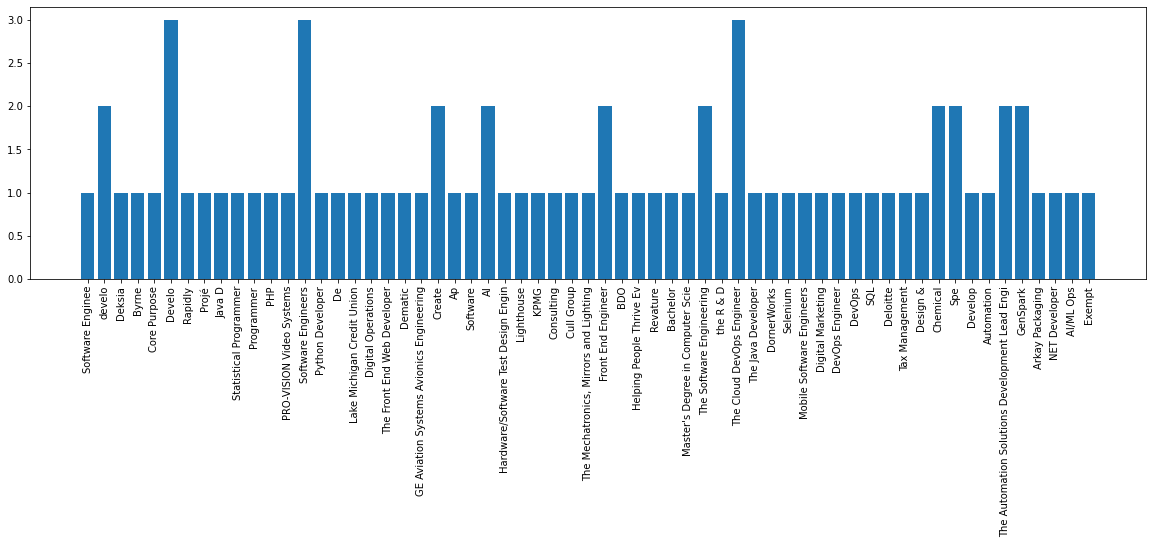

In [55]:
keys = buzz_words_res.keys()
values = buzz_words_res.values()
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20, 5)

plt.bar(keys, values)